In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("results/model_results.csv")

In [4]:
df["learning_rate"].value_counts()

0.001    4440
0.010    4440
0.100    4440
0.150    4440
Name: learning_rate, dtype: int64

In [6]:
df["num_epochs"].value_counts()

50     4440
100    4440
200    4440
300    4440
Name: num_epochs, dtype: int64

In [8]:
df["hidden_layers"].value_counts()

[2]             16
[14, 6, 18]     16
[14, 8, 10]     16
[14, 8, 8]      16
[14, 8, 6]      16
                ..
[6, 14, 12]     16
[6, 14, 14]     16
[6, 14, 16]     16
[6, 14, 18]     16
[20, 20, 20]    16
Name: hidden_layers, Length: 1110, dtype: int64

Como o número de épocas se relaciona com o learning_rate

- complexidade do modelo 
- learning rate
- época

+complexidade -> mais épocas, learning rate menor (supondo que não ha minimos locais)
              -> menor épocas, learning rate maior

In [77]:
df

,model_name,criterion,optimizer,learning_rate,num_epochs,input_size,hidden_layers,qtd_hidden_layers,activation_function,accuracy,average_loss
0,MLP,CrossEntropyLoss,Adam,0.001,50,16,[2],1,ReLU,0.331620,1.885373
1,MLP,CrossEntropyLoss,Adam,0.001,50,16,[4],1,ReLU,0.155711,1.754006
2,MLP,CrossEntropyLoss,Adam,0.001,50,16,[6],1,ReLU,0.359530,1.510663
3,MLP,CrossEntropyLoss,Adam,0.001,50,16,[8],1,ReLU,0.449137,1.409245
4,MLP,CrossEntropyLoss,Adam,0.001,50,16,[10],1,ReLU,0.610356,1.129692
...,...,...,...,...,...,...,...,...,...,...,...
17755,MLP,CrossEntropyLoss,Adam,0.150,300,16,"[20, 20, 12]",3,ReLU,0.875505,0.332717
17756,MLP,CrossEntropyLoss,Adam,0.150,300,16,"[20, 20, 14]",3,ReLU,0.891296,0.293618
17757,MLP,CrossEntropyLoss,Adam,0.150,300,16,"[20, 20, 16]",3,ReLU,0.850533,0.419246
17758,MLP,CrossEntropyLoss,Adam,0.150,300,16,"[20, 20, 18]",3,ReLU,0.879912,0.303522


In [62]:
def gambiarra(x):
    lista = eval(x)
    lista.insert(0, 16)
    return sum(i*j for i, j in zip(lista, lista[1:]))

test = (df.assign(complexidade = df.hidden_layers.apply(gambiarra))
   .groupby(["num_epochs", "learning_rate", "complexidade"])
   .agg({"accuracy": metrics})
)

In [63]:
test.columns = test.columns.droplevel()
test = test.reset_index()

In [76]:
test

,num_epochs,learning_rate,complexidade,mean,std
0,50,0.001,32,0.331620,NaN
1,50,0.001,36,0.334925,NaN
2,50,0.001,40,0.322622,0.000779
3,50,0.001,44,0.294161,0.047781
4,50,0.001,48,0.301016,0.182388
...,...,...,...,...,...
3531,300,0.150,1008,0.894234,NaN
3532,300,0.150,1040,0.873302,0.032200
3533,300,0.150,1048,0.897907,NaN
3534,300,0.150,1080,0.879912,NaN


In [29]:
import seaborn as sns

/home/rocabrera/.pyenv/versions/venv_playground/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


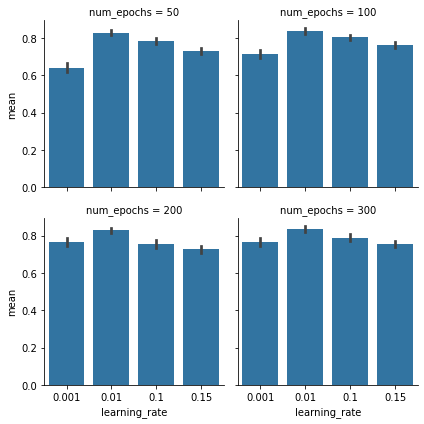

In [72]:
g = sns.FacetGrid(test, col="num_epochs",col_wrap=2)
g.map(sns.barplot, "learning_rate", "mean")

In [75]:
test["complexidade"]

0         32
1         36
2         40
3         44
4         48
        ... 
3531    1008
3532    1040
3533    1048
3534    1080
3535    1120
Name: complexidade, Length: 3536, dtype: int64

In [70]:
test

,num_epochs,learning_rate,complexidade,mean,std
0,50,0.001,32,0.331620,NaN
1,50,0.001,36,0.334925,NaN
2,50,0.001,40,0.322622,0.000779
3,50,0.001,44,0.294161,0.047781
4,50,0.001,48,0.301016,0.182388
...,...,...,...,...,...
3531,300,0.150,1008,0.894234,NaN
3532,300,0.150,1040,0.873302,0.032200
3533,300,0.150,1048,0.897907,NaN
3534,300,0.150,1080,0.879912,NaN


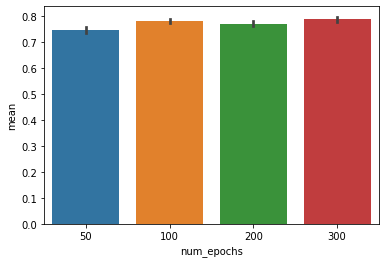

In [68]:
ax = sns.barplot(x="num_epochs", y="mean", data=test)

In [38]:
test

num_epochs learning_rate complexidade  accuracy           average_loss  \
                                                mean       std         mean   
0            50         0.001           32  0.331620       NaN     1.885373   
1            50         0.001           36  0.334925       NaN     1.782698   
2            50         0.001           40  0.322622  0.000779     1.509974   
3            50         0.001           44  0.294161  0.047781     1.714252   
4            50         0.001           48  0.301016  0.182388     1.599326   
...         ...           ...          ...       ...       ...          ...   
3531        300         0.150         1008  0.894234       NaN     0.289874   
3532        300         0.150         1040  0.873302  0.032200     0.354066   
3533        300         0.150         1048  0.897907       NaN     0.274689   
3534        300         0.150         1080  0.879912       NaN     0.303522   
3535        300         0.150         1120  0.872567       NaN     0.377993   

                
           std  
0          NaN  
1          NaN  
2     0.088068  
3     0.216051  
4     0.290210  
...        ...  
3531       NaN  
3532  0.092177  
3533       NaN  
3534       NaN  
3535       NaN  

[3536 rows x 7 columns]